# Boston housing price prediction

#### By: Pranav Ashok

## 0) Import important libraries

In [28]:
# For statistical analysis
import numpy as np 

# For dataset manipulation
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Import the defined performance metric for the model
from sklearn.metrics import r2_score

# For splitting data into training and testing subsets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# For devloping and optimizing the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from scipy import stats
from IPython import get_ipython
from IPython.display import display, HTML # For displaying dataframes
get_ipython().run_line_magic('matplotlib', 'inline') # Provides a pretty display

## 1) Data Preprocessing

In [2]:
# Function to get rid of outliers (values that are a given # of standard deviations away from mean)
def byeOutliers(df, numStdDev):
    tempDF = df
    for(columnName, columnData) in df.iteritems():
        columnMean = columnData.mean()
        columnStd = columnData.std()
        colNum = df.columns.get_loc(columnName)
        for rowNum in range(df.shape[0]):
            value = df.iloc[rowNum, colNum]
            if(value < (columnMean - numStdDev*columnStd) or value > (columnMean + numStdDev*columnStd)):
                tempDF = tempDF.drop(tempDF.index[rowNum])
                print('The value at...')
                print('Row: ' + str(rowNum) + ' Column: ' + columnName + ' is an outlier.')
                print('Value: ' + str(value))
                print('Column Mean: ' + str(columnMean))
                print('Column Std Dev: ' + str(columnStd) + '\n')
    return tempDF

In [3]:
# Load the original boston housing dataset
bostonDF = pd.read_csv('boston_housing_raw_dataset.csv')

# Only use the essential features ('RM', 'LSTAT', and 'PTRATIO') and target feature ('MEDV')
bostonDF = bostonDF[['rm', 'lstat', 'ptratio', 'medv']]

# delete later maybe
# Remove the training examples with a 'MEDV' value of 50 (most likely capped at 50 - inaccurate)
bostonDF = bostonDF[bostonDF.medv != 50]
bostonDF.reset_index(drop=True, inplace=True)

# Scale the price values by 21000 to account for 35 years of market inflation
bostonDF['medv'] = bostonDF['medv'] * 21000

# Use created function to find outliers and rid them to create a cleaner dataset
# I set the outlier cutoff to 4 std devs away from the mean due to the size of the dataset
bostonDF = byeOutliers(bostonDF, 4)

# Hold the features in a separate dataframe than the target feature
featuresDF = bostonDF.drop('medv', axis=1)
pricesDF = bostonDF.drop(['rm', 'lstat', 'ptratio'], axis=1)


# Display datasets after preprocessing
print("Boston housing dataset has {} data points with {} variables each.".format(*bostonDF.shape))
display(HTML(bostonDF.to_html()))
print('Features/Variables')
display(HTML(featuresDF.to_html()))
print('Target feature (house prices)')stand up comedy 
display(HTML(pricesDF.to_html()))

The value at...
Row: 354 Column: rm is an outlier.
Value: 3.5610000000000004
Column Mean: 6.245471428571438
Column Std Dev: 0.6531472650924527

Boston housing dataset has 489 data points with 4 variables each.


,rm,lstat,ptratio,medv
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


Features/Variables


,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
5,6.430,5.21,18.7
6,6.012,12.43,15.2
7,6.172,19.15,15.2
8,5.631,29.93,15.2
9,6.004,17.10,15.2


Target feature (house prices)


,medv
0,504000.0
1,453600.0
2,728700.0
3,701400.0
4,760200.0
5,602700.0
6,480900.0
7,569100.0
8,346500.0
9,396900.0


## 2) Data Exploration

In [4]:
# Create a series to represent the target feature for easier access to the data
prices = pricesDF['medv']

# Calculate some statistics
minimum_price = np.amin(prices)

maximum_price = np.amax(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

# Display the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024799.9999999999
Mean price: $454102.4539877301
Median price $438899.99999999994
Standard deviation of prices: $165077.22526359113


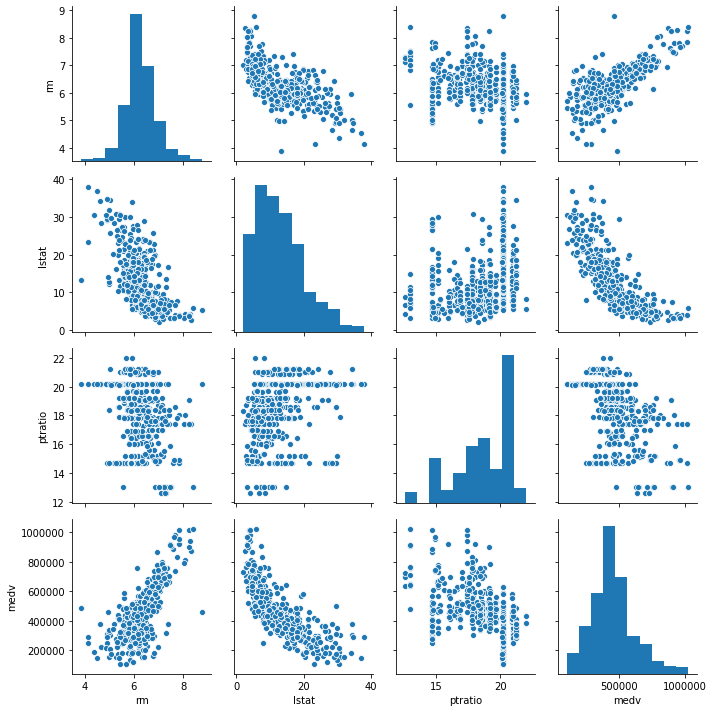

In [9]:
# Pairplot
sns.pairplot(bostonDF, height=2.5)
plt.tight_layout()

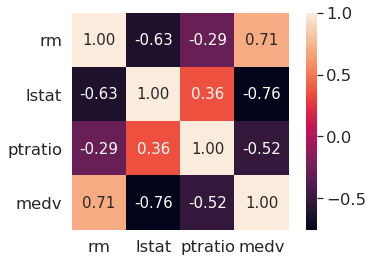

In [12]:
# Correlation Matrix (using a heat map)
cm = np.corrcoef(bostonDF.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=bostonDF.columns,
                xticklabels=bostonDF.columns)

## 3) Developing a Model

In [13]:
# This function calculates and returns the performance score between the true and predicted
# values using the coefficient of determination (R^2)
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [16]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(featuresDF, pricesDF, test_size=0.2, random_state = 42)

print("Training and testing split was successful.")

Training and testing split was successful.


## 4) Analyze the Model's Performance

/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined wit

/home/pranav/Documents/sandbox/projects/boston_housing/visuals.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


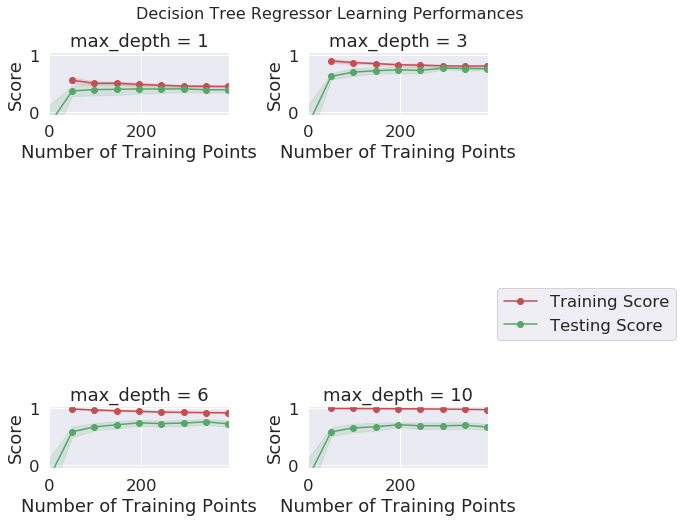

In [21]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(featuresDF, pricesDF)

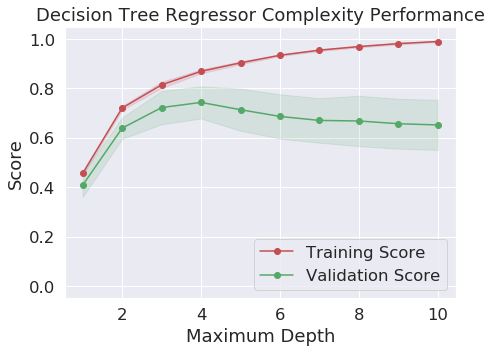

In [22]:
# Produce complexity curve for varying training set sizes and maximum depths
vs.ModelComplexity(X_train, y_train)

## 5) Evaluate the Model's Performance

In [23]:
# This function performs grid search over the 'max_depth' parameter for a 
# decision tree regressor trained on the input data [X, y]. 
def fit_model(X, y):
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [26]:
# Fit the training data to the model using grid search (Using the fit_model function)
reg = fit_model(X_train, y_train)

# Produce the optimized value for 'max_depth' (Resulting from grid search)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


## 6) Make Predictions

In [32]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $903,393.75


## 7) Measure the Model's Sensitivity and Applicability

In [30]:
vs.PredictTrials(featuresDF, pricesDF, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $390,250.00
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
